In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('futuristic_city_traffic.csv')
df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079


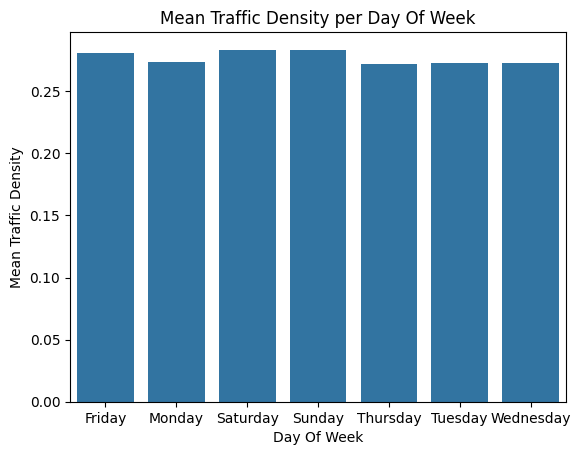

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean traffic density per state of the days
mean_traffic_density = df.groupby('Day Of Week')['Traffic Density'].mean()

# Create a bar plot
sns.barplot(x=mean_traffic_density.index, y=mean_traffic_density)
plt.xlabel('Day Of Week')
plt.ylabel('Mean Traffic Density')
plt.title('Mean Traffic Density per Day Of Week')
plt.show()


/Users/mben-yah/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


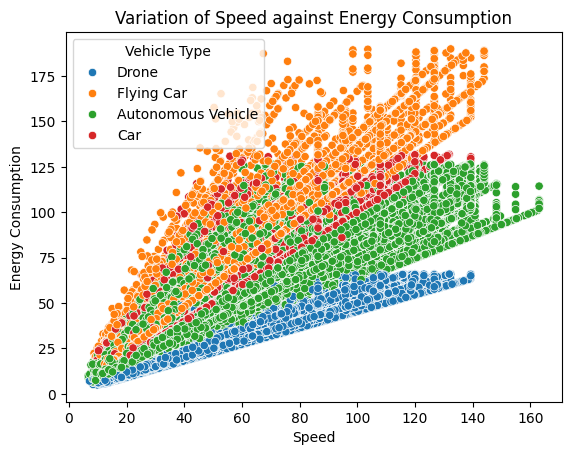

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Speed", y="Energy Consumption", hue='Vehicle Type', data=df)
plt.xlabel('Speed')
plt.ylabel('Energy Consumption')
plt.title('Variation of Speed against Energy Consumption')
plt.show()


In [18]:
df['Weather'].value_counts()

Weather
Solar Flare              244237
Snowy                    244195
Electromagnetic Storm    243857
Clear                    243650
Rainy                    243628
Name: count, dtype: int64

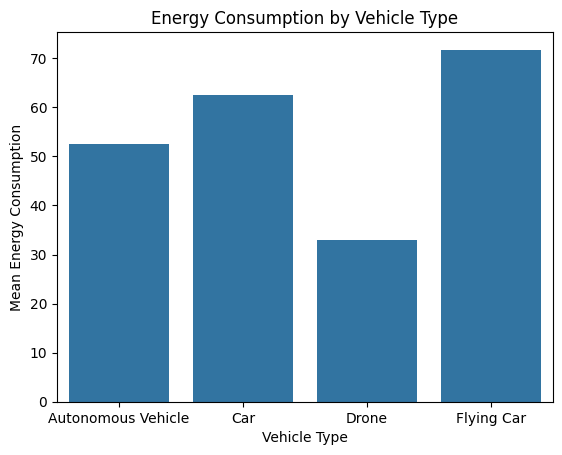

In [25]:
import seaborn as sns
# Calculate the mean energy consumption by vehicle type
mean_energy_consumption = df.groupby('Vehicle Type')['Energy Consumption'].mean()

# Create a bar plot
sns.barplot(x=mean_energy_consumption.index, y=mean_energy_consumption)
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Energy Consumption')
plt.title('Energy Consumption by Vehicle Type')
plt.show()


In [23]:
df['Random Event Occurred'].value_counts()

# mostly there isn't random event occuring

Random Event Occurred
0    1158726
1      60841
Name: count, dtype: int64

<Axes: xlabel='Random Event Occurred'>

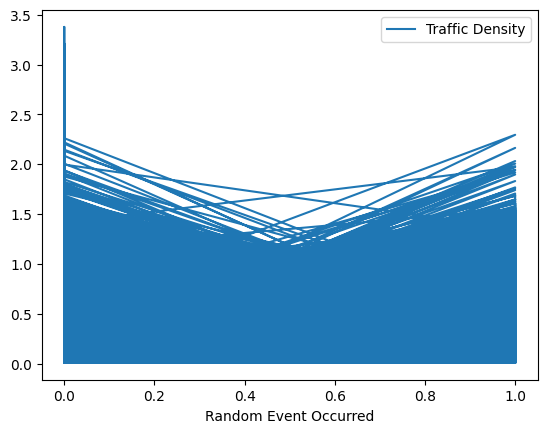

In [22]:
df['Is Peak Hour'].value_counts()

# most of the data is not from the peak hours

Is Peak Hour
0    1030901
1     188666
Name: count, dtype: int64

In [20]:
df['Economic Condition'].value_counts()

Economic Condition
Booming      406684
Recession    406571
Stable       406312
Name: count, dtype: int64

In [17]:
most_common_weather = df['Weather'].value_counts().idxmax()
most_common_weather


'Solar Flare'

In [21]:
speed_mean = df['Speed'].mean()
speed_std = df['Speed'].std()

speed_mean, speed_std

# seems like values are very far from the mean

(59.94475915492958, 26.63202814200599)

In [14]:
vehicles = df.drop_duplicates(subset='Vehicle Type')
vehicles

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
15,Ecoopolis,Car,Rainy,Booming,Friday,9,66.8856,0,0,66.8856,0.2521


Checking whether the daat is cleaned.

In [4]:
df.isna().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [5]:
unique_df_cities = df['City'].drop_duplicates()
unique_df_cities


0    SolarisVille
1        AquaCity
2       Neuroburg
3       Ecoopolis
5       TechHaven
8     MetropolisX
Name: City, dtype: object

There doesn't seem to be a linear relationship

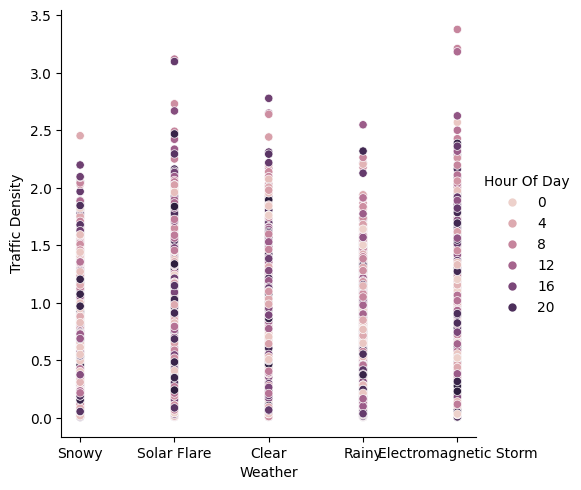

In [9]:
# Plot the data using the correct column names
sns.relplot(x="Weather", y="Traffic Density", hue='Hour Of Day' , data=df)


In [7]:
df.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

<Axes: xlabel='Energy Consumption', ylabel='Hour Of Day'>

/Users/mben-yah/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/mben-yah/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


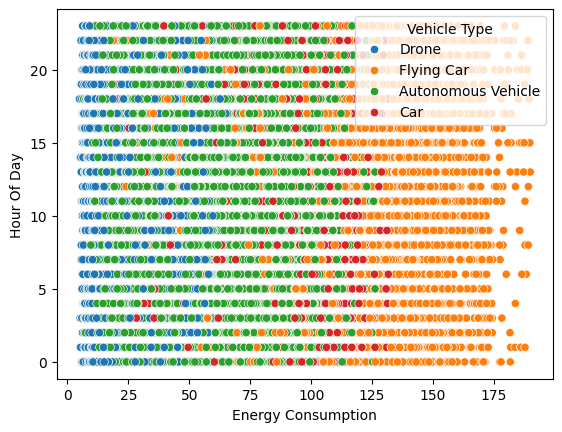

In [26]:
sns.scatterplot(x="Energy Consumption", y="Hour Of Day", hue='Vehicle Type', data=df)

/Users/mben-yah/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


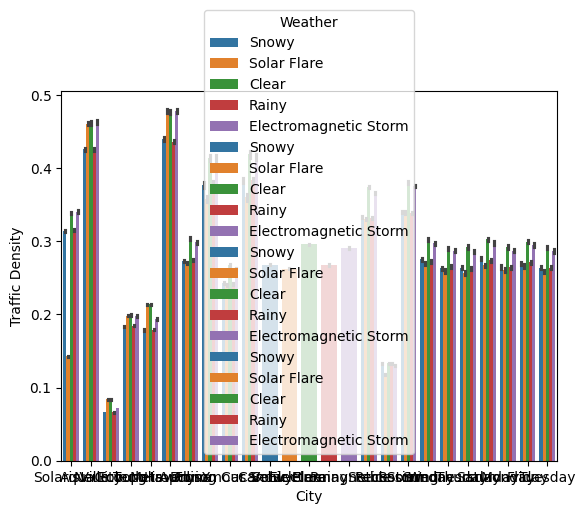

/Users/mben-yah/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


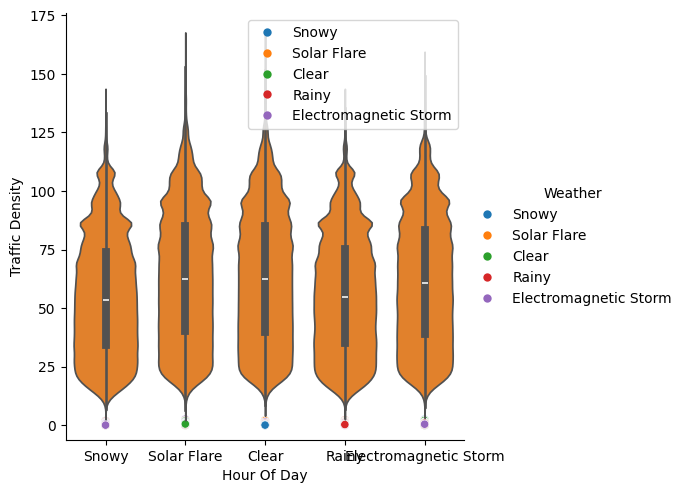

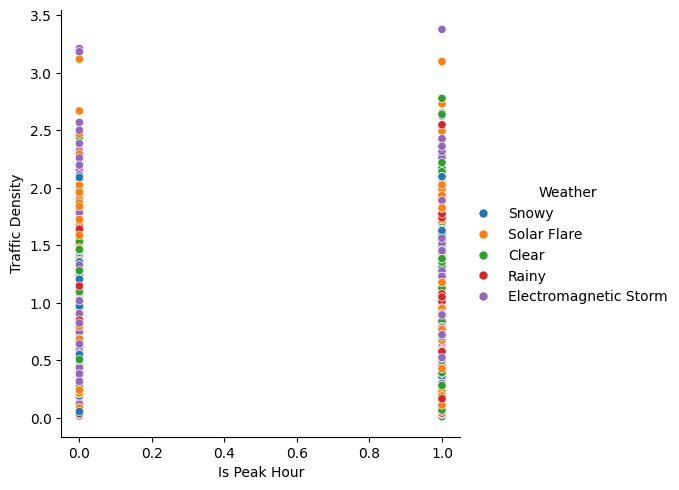

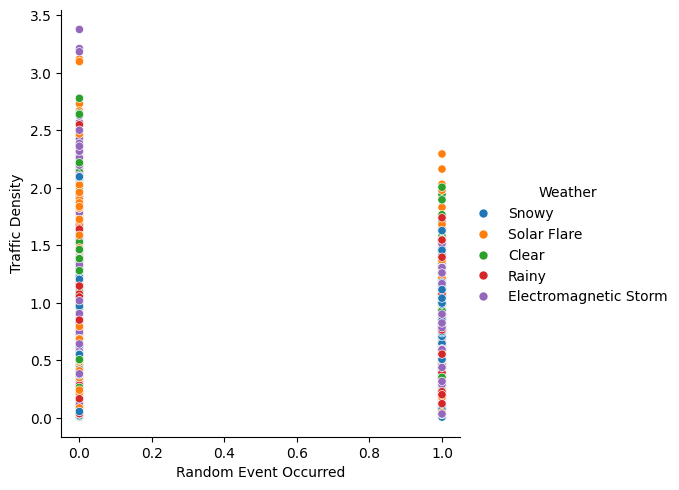

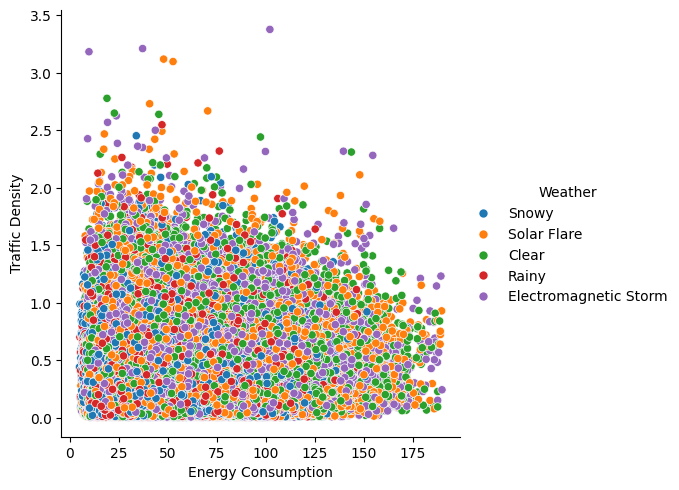

In [15]:
for feature in df.columns:
    # Choose appropriate plot type based on data type and relationship with weather
    
    # Categorical features
    if df[feature].dtype == 'object':
        sns.barplot(x=feature, y="Traffic Density", hue="Weather", data=df)
    
    # Numerical features (except Speed)
    elif feature not in ['Speed', 'Traffic Density']:
        sns.relplot(x=feature, y="Traffic Density", hue="Weather", data=df)
    
    # Special case for Speed (distribution may be relevant)
    elif feature == 'Speed':
        sns.violinplot(x="Weather", y="Speed", data=df)
    
    # Customize plots based on your preferences (e.g., color palette, title, labels)
    

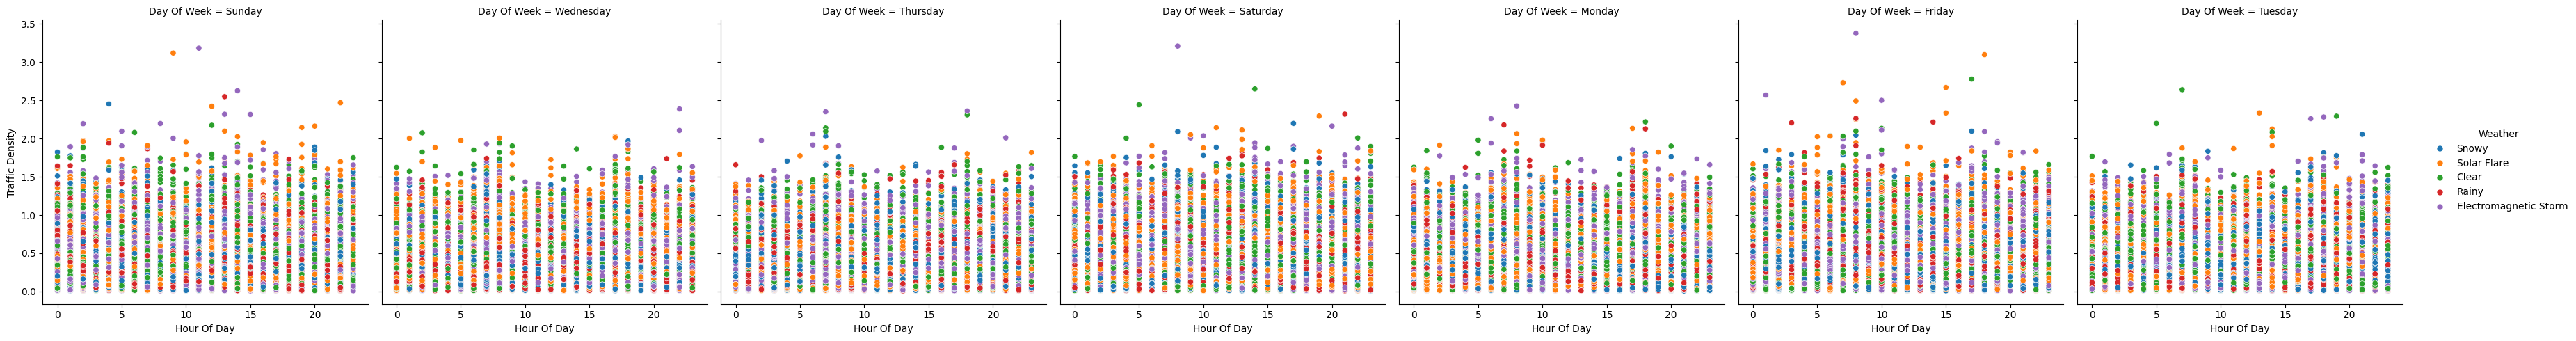

In [8]:
sns.relplot(x="Hour Of Day", y="Traffic Density", hue="Weather", col="Day Of Week", data=df)


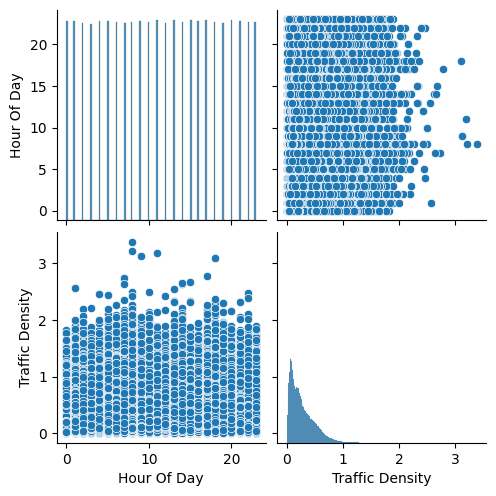

In [12]:
sns.pairplot(df[["Hour Of Day", "Traffic Density", "Weather", "Day Of Week"]])


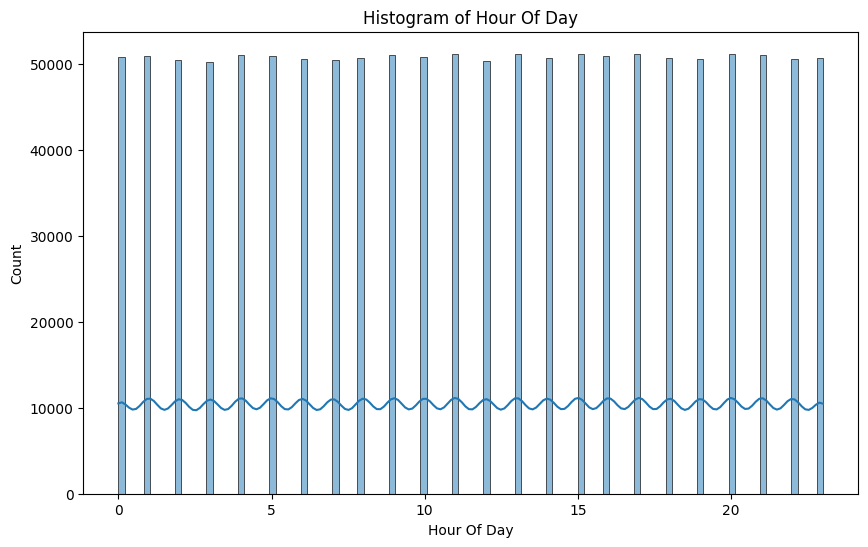

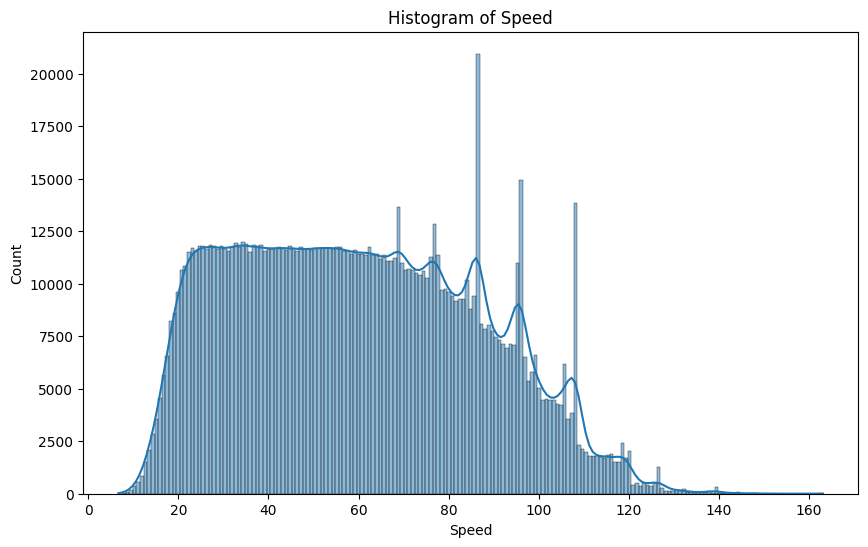

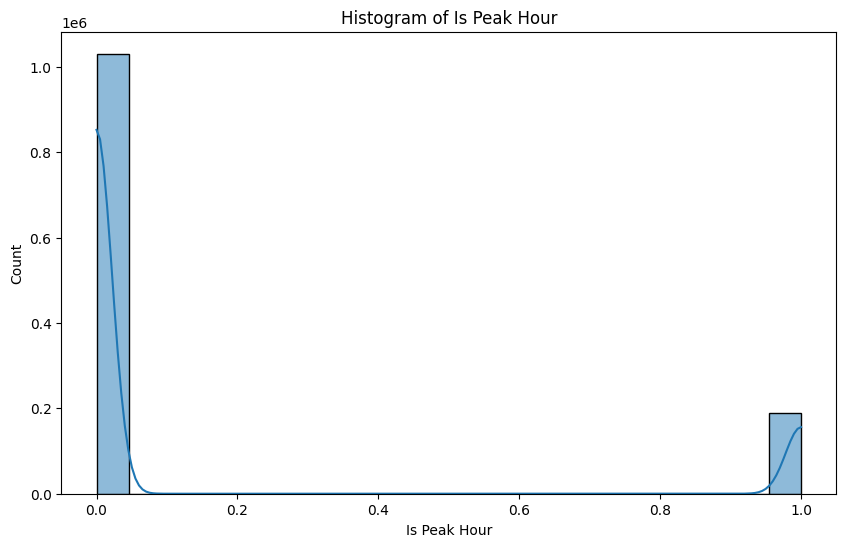

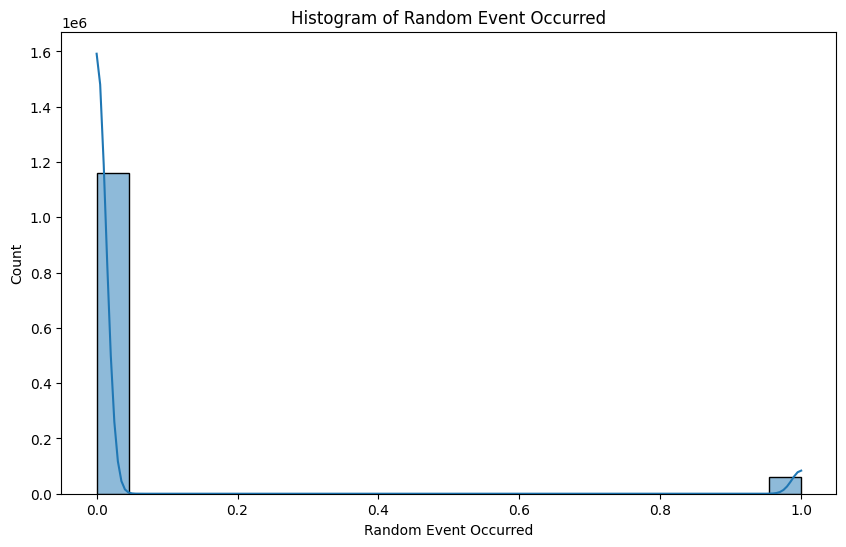

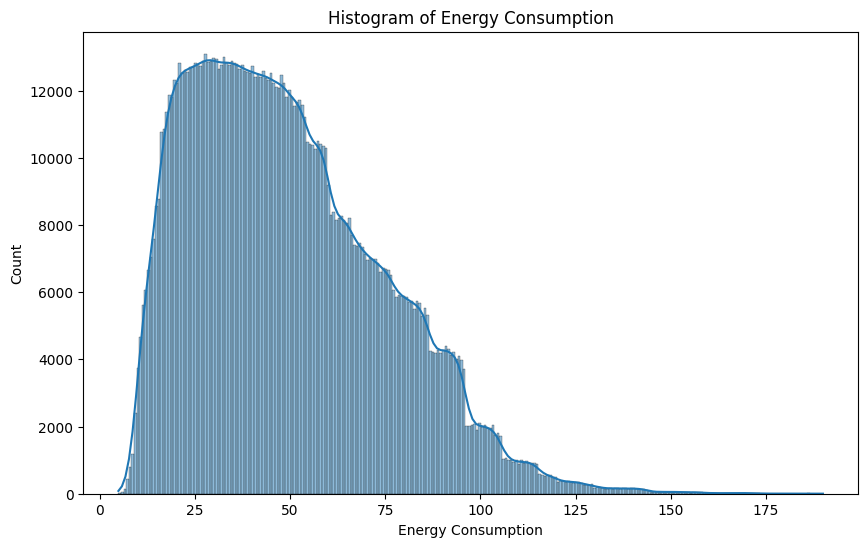

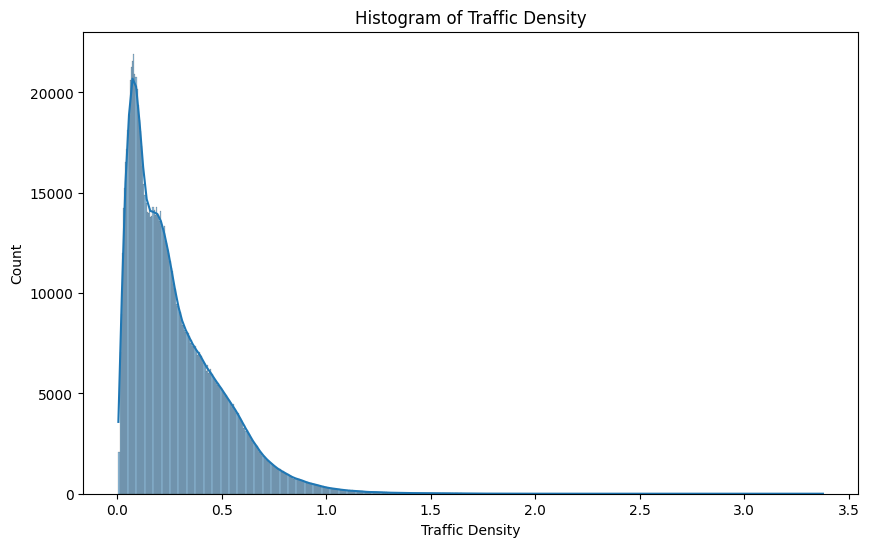

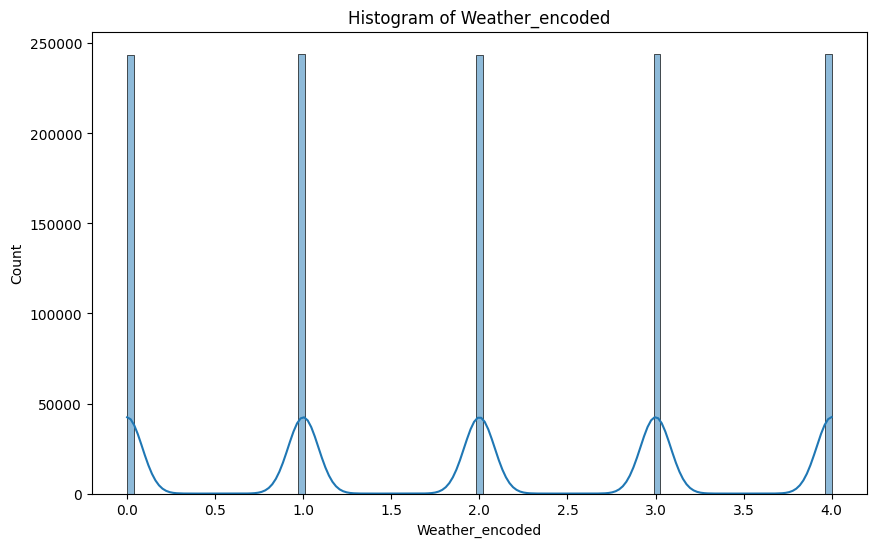

In [30]:
# Histograms for numerical columns

import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

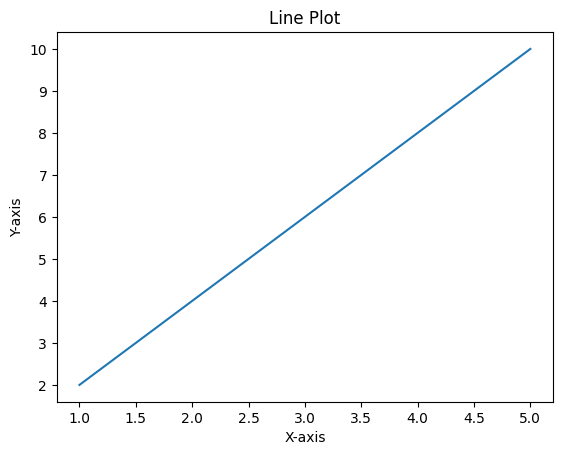

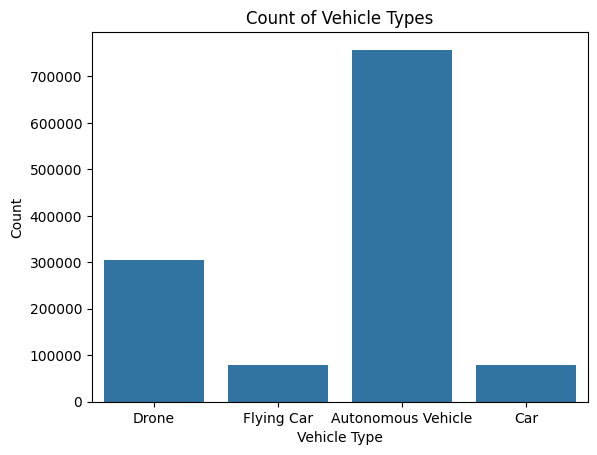

In [31]:
import matplotlib.pyplot as plt

# Generate some data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create a line plot
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.show()
sns.countplot(x='Vehicle Type', data=df)
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Count of Vehicle Types')
plt.show()


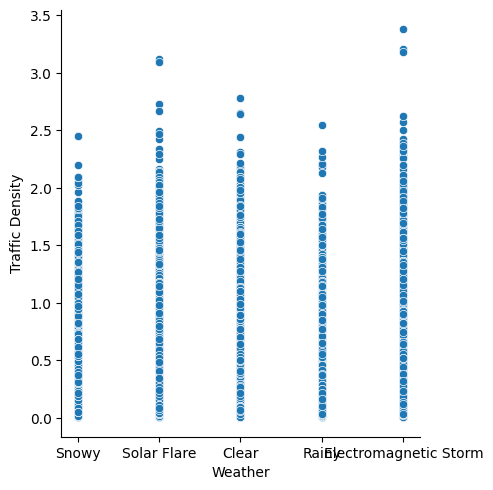

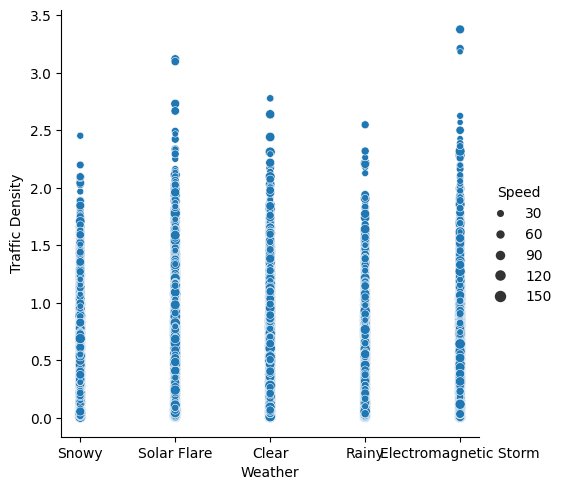

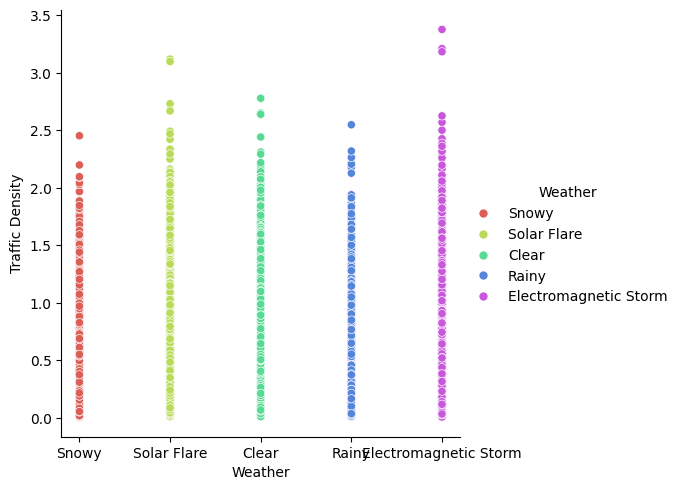

In [34]:
sns.relplot(x="Weather", y="Traffic Density", data=df)
# You can also use size or color to differentiate by other factors:
sns.relplot(x="Weather", y="Traffic Density", size="Speed", data=df)
# Consider using a categorical colormap for weather:
sns.relplot(x="Weather", y="Traffic Density", hue="Weather", palette="hls", data=df)
